In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터 불러오기

In [ ]:
# LSCP(영향권) 기준 각 데이터들 불러옴
# LSCP_500 : 논문 근거
# LSCP_363 : 500m 이내 스테이션 간 평균거리
# 영향권 설정에 더 알맞은 거리가 있는지 확인하기 위해 450, 400, 350, 300, 250 각각으로 LSCP 데이터 생성 후 불러옴.
# 각각은 Bike_LSCP_300 코드에서 lscp_distance를 조정하여 산출

lscp_500=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_500.csv',index_col=0)
lscp_450=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_450.csv',index_col=0)
lscp_400=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_400.csv',index_col=0)
lscp_350=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_350.csv',index_col=0)
lscp_300=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_300.csv',index_col=0)
lscp_363=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_363.csv',index_col=0)
lscp_250=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_250.csv',index_col=0)

Bike_Station : 자전거 스테이션 번호  
Loan_count : 총 대여 횟수  
Return_count	: 총 반납 횟수  
Population	: 주변 거주 인구  
Sub_pop : 주변 지하철 탑승 인구  
Bus_pop : 주변 버스 탑승 인구  
DN_avg : 주변 고도  
Road_yes	: 자전거 도로 유무  
Space_count : 주변 주차장 공간  
Culture_count : 주변 문화시설 수  
Sport_count : 주변 체육시설 수  	
KINTEX	: 킨텍스 유무  
Hosu_yes	: 호수 공원 유무  
Park_count : 주변 공원 수  

In [ ]:
lscp_500

,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,Loan_Return,Sport_yes
0,101,8366,9207,8692,0,228849,21,1,711,2,1,0,0,0,17573,1
1,103,4535,5121,14038,0,81961,25,1,0,0,7,0,0,2,9656,1
2,104,13402,9330,13872,0,78852,35,0,0,0,2,0,0,0,22732,1
3,105,2806,2696,11255,8607849,422520,25,1,349,0,0,0,0,0,5502,0
4,106,4444,2357,4859,8607849,308135,30,1,349,0,0,0,0,0,6801,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,4190,3662,10617,0,31836,25,0,0,0,4,0,0,1,7852,1
160,351,473,406,12091,0,63520,58,0,0,0,2,0,0,0,879,1
161,352,0,0,7293,0,89081,14,1,282,1,0,1,0,1,0,0
162,353,0,0,7236,0,91515,16,1,282,1,0,1,0,1,0,0


In [ ]:
lscp_363

,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,Loan_Return,Sport_yes
0,101,8366,9207,8692,0,177462,18,1,419,0,0,0,0,0,17573,0
1,103,4535,5121,14038,0,47393,23,1,0,0,7,0,0,1,9656,1
2,104,13402,9330,13872,0,57385,35,0,0,0,0,0,0,0,22732,0
3,105,2806,2696,11255,0,167918,24,1,349,0,0,0,0,0,5502,0
4,106,4444,2357,4859,8607849,257783,27,1,349,0,0,0,0,0,6801,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,4190,3662,10617,0,31581,26,0,0,0,1,0,0,1,7852,1
160,351,473,406,12091,0,37680,38,0,0,0,2,0,0,0,879,1
161,352,0,0,7293,0,72143,13,1,282,0,0,0,0,1,0,0
162,353,0,0,7236,0,87525,15,1,282,1,0,0,0,0,0,0


## Corr Plot
- 변수 간 상관관계 시각화

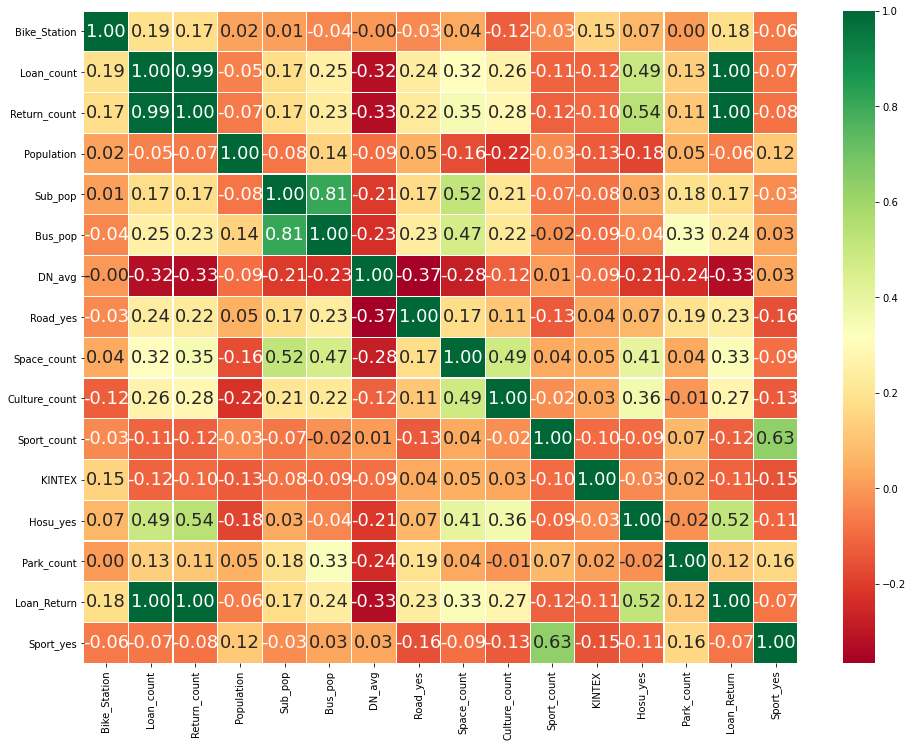

In [ ]:
plt.figure(figsize=(16,12))
g=sns.heatmap(lscp_500.corr(), cmap='RdYlGn',linewidths=0.2,annot_kws={'size':18},annot=True,fmt='.2f')

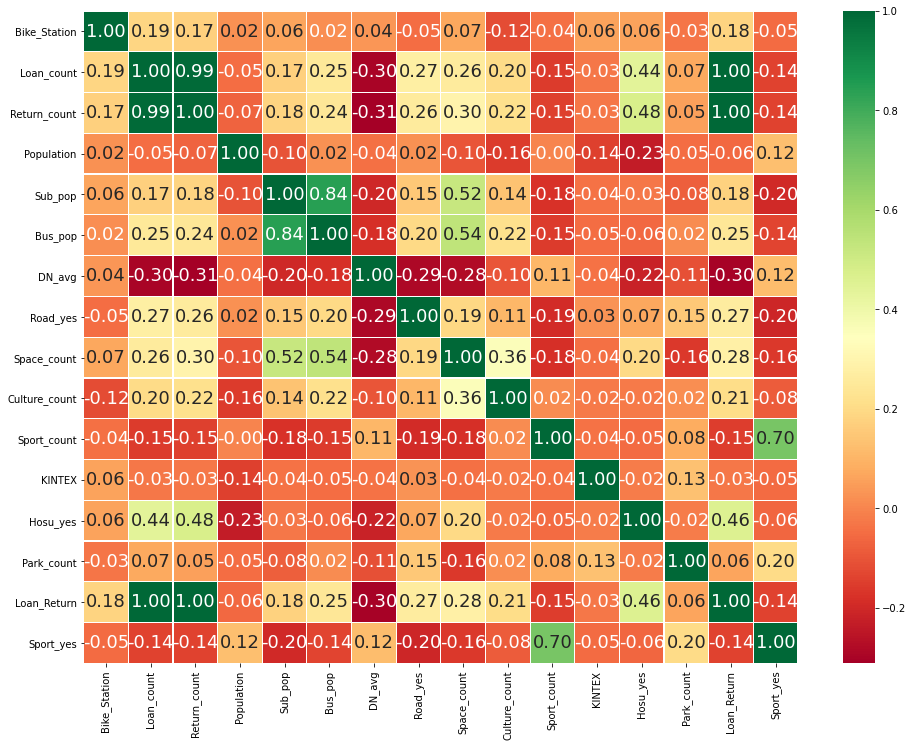

In [ ]:
plt.figure(figsize=(16,12))
g=sns.heatmap(lscp_363.corr(), cmap='RdYlGn',linewidths=0.2,annot_kws={'size':18},annot=True,fmt='.2f')

ROAN과 RETURN의 상관계수가 높았음을 볼 수 있었고, Sub_pop과 Bus_pop의 상관 계수가 0.8 이상으로 높게 나왔음을 알 수 있었다.    
또한, 호수 공원의 유무 또한 LOAN, RETURN과 상관 계수가 0.4 이상으로 나왔음을 볼 수 있었다.  
더불어 Space_count와 Sub_pop, Bus_pop의 상관 계수가 0.5 이상으로 나왔는데, 이는 주차장 공간과 대중교통 시설과의 상관 정도가 어느 정도 있다는 점을 시사한다. 

# 피쳐 엔지니어링


In [ ]:
# trans_pop : 지하철, 버스 유동인구를 합쳐줌
# all_pop : 주거 인구 + 유동 인구
# Loan_Return : 대여, 반납 횟수 합
# Sport_yes : 체육 시설의 경우, 한 장소에 여러 개의 시설이 있는 복합 시설이 있어 유무로 우선 영향을 파악하는 게 낫다고 판단함.

lscp_500['Loan_Return']=lscp_500['Loan_count']+lscp_500['Return_count']
lscp_500['Sport_yes']=np.where(lscp_500['Sport_count']>0,1,0)

lscp_363['Loan_Return']=lscp_363['Loan_count']+lscp_363['Return_count']
lscp_363['Sport_yes']=np.where(lscp_363['Sport_count']>0,1,0)

lscp_450['Loan_Return']=lscp_450['Loan_count']+lscp_450['Return_count']
lscp_450['Sport_yes']=np.where(lscp_450['Sport_count']>0,1,0)

lscp_400['Loan_Return']=lscp_400['Loan_count']+lscp_400['Return_count']
lscp_400['Sport_yes']=np.where(lscp_400['Sport_count']>0,1,0)

lscp_350['Loan_Return']=lscp_350['Loan_count']+lscp_350['Return_count']
lscp_350['Sport_yes']=np.where(lscp_350['Sport_count']>0,1,0)

lscp_300['Loan_Return']=lscp_300['Loan_count']+lscp_300['Return_count']
lscp_300['Sport_yes']=np.where(lscp_300['Sport_count']>0,1,0)

lscp_250['Loan_Return']=lscp_250['Loan_count']+lscp_250['Return_count']
lscp_250['Sport_yes']=np.where(lscp_250['Sport_count']>0,1,0)

## 다변량 회귀 모형 설계

In [ ]:
# 대여 + 반납 lscp_500
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+Bus_pop+DN_avg+Road_yes+Space_count+Culture_count+Sport_yes+KINTEX+Hosu_yes+Park_count', data = lscp_500).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     9.574
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           1.15e-13
Time:                        18:19:58   Log-Likelihood:                -1900.5
No. Observations:                 164   AIC:                             3827.
Df Residuals:                     151   BIC:                             3867.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.424e+04   1.47e+04      0.966      0.336   -1.49e+04    4.34e+04
Bike_Station     72.9629     22.924      3.183      0.002      27.669     118.257
Population       -0.7148      0.611     -1.169      0.244      -1.923       0.493
Sub_pop          -0.0019      0.001     -2.006      0.047      -0.004   -2.89e-05
Bus_pop           0.0833      0.026      3.153      0.002       0.031       0.135
DN_avg         -616.4892    252.933     -2.437      0.016   -1116.234    -116.745
Road_yes       1.328e+04   9081.464      1.463      0.146   -4658.198    3.12e+04
Space_count      -2.0672     10.514     -0.197      0.844     -22.841      18.707
Culture_count  1977.3562   2472.214      0.800      0.425   -2907.242    6861.954
Sport_yes      -895.3961   4528.299     -0.198      0.844   -9842.404    8051.612
KINTEX        -3.682e+04   1.67e+04     -2.199      0.029   -6.99e+04   -3738.584
Hosu_yes       6.789e+04   1.12e+04      6.054      0.000    4.57e+04       9e+04
Park_count     -280.2923   2421.064     -0.116      0.908   -5063.828    4503.244
==============================================================================
Omnibus:                       39.589   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.388
Skew:                           1.002   Prob(JB):                     4.32e-22
Kurtosis:                       6.222   Cond. No.                     3.95e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 대여 + 반납 lscp_363
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+Bus_pop+DN_avg+Road_yes+Space_count+Culture_count+Sport_yes+KINTEX+Hosu_yes+Park_count', data = lscp_363).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     8.350
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           5.68e-12
Time:                        18:19:58   Log-Likelihood:                -1905.2
No. Observations:                 164   AIC:                             3836.
Df Residuals:                     151   BIC:                             3877.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3297.8719   1.32e+04      0.250      0.803   -2.27e+04    2.93e+04
Bike_Station     69.9262     23.281      3.004      0.003      23.929     115.924
Population        0.3374      0.615      0.549      0.584      -0.877       1.552
Sub_pop          -0.0011      0.001     -0.956      0.341      -0.003       0.001
Bus_pop           0.0777      0.034      2.287      0.024       0.011       0.145
DN_avg         -516.6047    279.486     -1.848      0.066   -1068.813      35.603
Road_yes       1.548e+04   7475.700      2.071      0.040     710.960    3.03e+04
Space_count      -8.1378     14.581     -0.558      0.578     -36.946      20.671
Culture_count  7507.7667   2876.438      2.610      0.010    1824.504    1.32e+04
Sport_yes     -3365.7473   5079.843     -0.663      0.509   -1.34e+04    6671.001
KINTEX         -1.32e+04   2.89e+04     -0.457      0.648   -7.02e+04    4.38e+04
Hosu_yes       8.137e+04   1.29e+04      6.329      0.000     5.6e+04    1.07e+05
Park_count     1485.0446   3189.737      0.466      0.642   -4817.234    7787.323
==============================================================================
Omnibus:                       36.372   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.644
Skew:                           0.871   Prob(JB):                     8.48e-23
Kurtosis:                       6.441   Cond. No.                     5.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

LSCP_500과 LSCP_363을 통해 회귀 모델을 만들어 보았다.  
모델 자체를 활용하기엔 R스퀘어 값이나 유의수준 값이 유의미하지 않아 어려움이 있으나  
R스퀘어 값을 활용해 더욱 적절한 LSCP 영향권 거리를 설정할 수 있을 것이며  
유의 수준을 활용해 유의미한 피쳐만 뽑아낼 수 있을 것이라 판단했다.

우선 R스퀘어를 비교하기 위해 각 LSCP들의 회귀 모형을 만들어보았다.

In [ ]:
# 대여 + 반납 lscp_450
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+Bus_pop+DN_avg+Road_yes+Space_count+Culture_count+Sport_yes+KINTEX+Hosu_yes+Park_count', data = lscp_450).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     8.827
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           1.22e-12
Time:                        18:19:58   Log-Likelihood:                -1903.3
No. Observations:                 164   AIC:                             3833.
Df Residuals:                     151   BIC:                             3873.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.202e+04   1.42e+04      0.846      0.399   -1.61e+04    4.01e+04
Bike_Station     63.8934     23.316      2.740      0.007      17.825     109.962
Population       -0.1241      0.617     -0.201      0.841      -1.344       1.096
Sub_pop          -0.0008      0.001     -0.742      0.459      -0.003       0.001
Bus_pop           0.0562      0.028      1.988      0.049       0.000       0.112
DN_avg         -540.7465    265.981     -2.033      0.044   -1066.271     -15.222
Road_yes       1.355e+04   8491.913      1.596      0.113   -3227.616    3.03e+04
Space_count      -4.1113     12.773     -0.322      0.748     -29.349      21.126
Culture_count  2180.7413   2590.427      0.842      0.401   -2937.422    7298.904
Sport_yes     -5965.0257   4666.067     -1.278      0.203   -1.52e+04    3254.183
KINTEX        -3.209e+04   2.05e+04     -1.565      0.120   -7.26e+04    8419.347
Hosu_yes       6.691e+04    1.2e+04      5.590      0.000    4.33e+04    9.06e+04
Park_count     2079.3078   2832.101      0.734      0.464   -3516.354    7674.970
==============================================================================
Omnibus:                       39.808   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.036
Skew:                           0.983   Prob(JB):                     1.55e-23
Kurtosis:                       6.392   Cond. No.                     4.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 대여 + 반납 lscp_400
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+Bus_pop+DN_avg+Road_yes+Space_count+Culture_count+Sport_yes+KINTEX+Hosu_yes+Park_count', data = lscp_400).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     9.138
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           4.51e-13
Time:                        18:19:58   Log-Likelihood:                -1902.1
No. Observations:                 164   AIC:                             3830.
Df Residuals:                     151   BIC:                             3871.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.161e+04   1.29e+04      0.900      0.369   -1.39e+04    3.71e+04
Bike_Station     62.4129     23.079      2.704      0.008      16.813     108.013
Population        0.0372      0.606      0.061      0.951      -1.160       1.235
Sub_pop          -0.0003      0.001     -0.267      0.790      -0.003       0.002
Bus_pop           0.0558      0.031      1.800      0.074      -0.005       0.117
DN_avg         -592.8359    267.634     -2.215      0.028   -1121.627     -64.045
Road_yes       1.357e+04   7622.350      1.780      0.077   -1492.464    2.86e+04
Space_count     -12.3828     14.139     -0.876      0.383     -40.319      15.554
Culture_count  3775.4222   2830.501      1.334      0.184   -1817.078    9367.923
Sport_yes     -5643.8390   4754.717     -1.187      0.237    -1.5e+04    3750.525
KINTEX        -2.885e+04   2.05e+04     -1.406      0.162   -6.94e+04    1.17e+04
Hosu_yes        7.02e+04   1.17e+04      5.990      0.000     4.7e+04    9.34e+04
Park_count     3048.3495   3008.637      1.013      0.313   -2896.113    8992.812
==============================================================================
Omnibus:                       35.376   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.173
Skew:                           0.868   Prob(JB):                     5.86e-21
Kurtosis:                       6.259   Cond. No.                     4.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 대여 + 반납 lscp_350
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+Bus_pop+DN_avg+Road_yes+Space_count+Culture_count+Sport_yes+KINTEX+Hosu_yes+Park_count', data = lscp_350).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     8.450
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           4.10e-12
Time:                        18:19:58   Log-Likelihood:                -1904.8
No. Observations:                 164   AIC:                             3836.
Df Residuals:                     151   BIC:                             3876.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3942.2566   1.31e+04      0.300      0.765    -2.2e+04    2.99e+04
Bike_Station     70.2517     23.264      3.020      0.003      24.286     116.217
Population        0.4418      0.617      0.716      0.475      -0.778       1.661
Sub_pop          -0.0010      0.001     -0.849      0.397      -0.003       0.001
Bus_pop           0.0748      0.036      2.079      0.039       0.004       0.146
DN_avg         -535.1345    282.578     -1.894      0.060   -1093.453      23.184
Road_yes       1.497e+04   7437.057      2.013      0.046     277.797    2.97e+04
Space_count      -9.4603     14.737     -0.642      0.522     -38.578      19.658
Culture_count  8344.1635   3063.657      2.724      0.007    2290.993    1.44e+04
Sport_yes     -6161.2857   5177.190     -1.190      0.236   -1.64e+04    4067.801
KINTEX        -1.445e+04   2.88e+04     -0.502      0.617   -7.13e+04    4.24e+04
Hosu_yes       8.124e+04   1.28e+04      6.325      0.000    5.59e+04    1.07e+05
Park_count     2080.5048   3227.356      0.645      0.520   -4296.101    8457.111
==============================================================================
Omnibus:                       35.076   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.446
Skew:                           0.827   Prob(JB):                     1.54e-22
Kurtosis:                       6.458   Cond. No.                     5.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 대여 + 반납 lscp_300
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+Bus_pop+DN_avg+Road_yes+Space_count+Culture_count+Sport_yes+KINTEX+Hosu_yes+Park_count', data = lscp_300).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     10.02
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           2.86e-14
Time:                        18:19:58   Log-Likelihood:                -1898.8
No. Observations:                 164   AIC:                             3824.
Df Residuals:                     151   BIC:                             3864.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9220.6743   1.26e+04     -0.732      0.465   -3.41e+04    1.57e+04
Bike_Station     89.2562     22.791      3.916      0.000      44.225     134.287
Population        0.8812      0.600      1.469      0.144      -0.304       2.066
Sub_pop           0.0028      0.001      2.146      0.033       0.000       0.005
Bus_pop           0.0313      0.037      0.853      0.395      -0.041       0.104
DN_avg         -436.8140    276.833     -1.578      0.117    -983.781     110.153
Road_yes       1.615e+04   6911.421      2.337      0.021    2494.612    2.98e+04
Space_count     -37.8018     16.342     -2.313      0.022     -70.090      -5.514
Culture_count  1.446e+04   3361.525      4.300      0.000    7813.368    2.11e+04
Sport_yes       100.1593   5458.578      0.018      0.985   -1.07e+04    1.09e+04
KINTEX        -1.195e+04   2.78e+04     -0.429      0.668   -6.69e+04     4.3e+04
Hosu_yes       9.045e+04   1.25e+04      7.263      0.000    6.58e+04    1.15e+05
Park_count     3319.3752   3283.082      1.011      0.314   -3167.335    9806.085
==============================================================================
Omnibus:                       22.983   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.272
Skew:                           0.693   Prob(JB):                     1.80e-09
Kurtosis:                       4.992   Cond. No.                     4.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 대여 + 반납 lscp_250
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+Bus_pop+DN_avg+Road_yes+Space_count+Culture_count+Sport_yes+KINTEX+Hosu_yes+Park_count', data = lscp_250).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     8.758
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           1.51e-12
Time:                        18:19:58   Log-Likelihood:                -1903.6
No. Observations:                 164   AIC:                             3833.
Df Residuals:                     151   BIC:                             3873.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7980.3969   1.28e+04     -0.623      0.534   -3.33e+04    1.73e+04
Bike_Station     87.4562     23.218      3.767      0.000      41.582     133.331
Population        0.8366      0.609      1.374      0.172      -0.367       2.040
Sub_pop           0.0016      0.001      1.178      0.241      -0.001       0.004
Bus_pop           0.0525      0.038      1.369      0.173      -0.023       0.128
DN_avg         -454.1759    294.252     -1.543      0.125   -1035.558     127.206
Road_yes        1.54e+04   6752.734      2.280      0.024    2056.519    2.87e+04
Space_count     -21.5061     19.813     -1.085      0.279     -60.653      17.641
Culture_count  2.134e+04   4937.438      4.322      0.000    1.16e+04    3.11e+04
Sport_yes       904.2169   6262.382      0.144      0.885   -1.15e+04    1.33e+04
KINTEX        -1.636e+04   2.88e+04     -0.568      0.571   -7.32e+04    4.05e+04
Hosu_yes        8.52e+04   1.38e+04      6.190      0.000     5.8e+04    1.12e+05
Park_count     5694.6078   3736.136      1.524      0.130   -1687.246    1.31e+04
==============================================================================
Omnibus:                       25.132   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.621
Skew:                           0.741   Prob(JB):                     1.24e-10
Kurtosis:                       5.117   Cond. No.                     4.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

LSCP 300일 때의 R스퀘어 값이 가장 높음을 확인할 수 있었음.  
LSCP 300모델을 기본으로 설정하고 낮은 유의수준을 보이는 모델을 STEPWISE 방법론으로 직접 변수들을 조정해가며 산출하고자 함.

# 다변량 회귀 모델(LSCP_300)_base

In [ ]:
# 대여 + 반납 lscp_300
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+DN_avg+Road_yes+Space_count+Culture_count+Hosu_yes+Park_count', data = lscp_300).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     13.44
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           9.38e-16
Time:                        18:19:58   Log-Likelihood:                -1899.4
No. Observations:                 164   AIC:                             3819.
Df Residuals:                     154   BIC:                             3850.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.058e+04   1.24e+04     -0.856      0.393    -3.5e+04    1.38e+04
Bike_Station     89.2774     22.563      3.957      0.000      44.703     133.851
Population        1.0512      0.567      1.853      0.066      -0.069       2.172
Sub_pop           0.0036      0.001      4.356      0.000       0.002       0.005
DN_avg         -411.0401    273.404     -1.503      0.135    -951.146     129.066
Road_yes       1.635e+04   6760.375      2.419      0.017    2999.685    2.97e+04
Space_count     -34.4392     15.791     -2.181      0.031     -65.633      -3.245
Culture_count  1.488e+04   3308.372      4.498      0.000    8344.994    2.14e+04
Hosu_yes       9.147e+04   1.23e+04      7.439      0.000    6.72e+04    1.16e+05
Park_count     3434.2552   3164.355      1.085      0.279   -2816.891    9685.401
==============================================================================
Omnibus:                       22.547   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.080
Skew:                           0.708   Prob(JB):                     8.87e-09
Kurtosis:                       4.850   Cond. No.                     2.43e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

이 모델이 가장 높은 adj R 스퀘어값을 보였다. 다른 변수들이(Bus_pop, Sport_yes, KINTEX) 빠졌음에도 좀 더 나은 설명력을 보여주었다.  
Park_count 변수의 유의수준이 높은데 이를 제거했을 경우 R 스퀘어 값이 떨어져 그대로 내버려뒀다.

In [ ]:
# 대여 + 반납 lscp_300 without Park_count
result = sm.ols(formula = 'Loan_Return ~ Bike_Station+Population+Sub_pop+DN_avg+Road_yes+Space_count+Culture_count+Hosu_yes', data = lscp_300).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Return   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     14.96
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           4.05e-16
Time:                        18:19:58   Log-Likelihood:                -1900.0
No. Observations:                 164   AIC:                             3818.
Df Residuals:                     155   BIC:                             3846.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8177.0676   1.22e+04     -0.672      0.503   -3.22e+04    1.59e+04
Bike_Station     89.8442     22.570      3.981      0.000      45.259     134.429
Population        0.9519      0.560      1.699      0.091      -0.155       2.058
Sub_pop           0.0035      0.001      4.294      0.000       0.002       0.005
DN_avg         -435.8135    272.606     -1.599      0.112    -974.315     102.688
Road_yes       1.775e+04   6640.900      2.673      0.008    4631.165    3.09e+04
Space_count     -35.7731     15.752     -2.271      0.025     -66.889      -4.658
Culture_count   1.48e+04   3309.440      4.472      0.000    8262.846    2.13e+04
Hosu_yes       9.028e+04   1.23e+04      7.368      0.000    6.61e+04    1.14e+05
==============================================================================
Omnibus:                       24.408   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.769
Skew:                           0.745   Prob(JB):                     8.51e-10
Kurtosis:                       4.973   Cond. No.                     2.40e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 대여 lscp_300
result = sm.ols(formula = 'Loan_count ~ Bike_Station+Population+Sub_pop+DN_avg+Road_yes+Space_count+Culture_count+Hosu_yes+Park_count', data = lscp_300).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Loan_count   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     12.74
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           5.00e-15
Time:                        18:19:59   Log-Likelihood:                -1791.3
No. Observations:                 164   AIC:                             3603.
Df Residuals:                     154   BIC:                             3634.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5829.2531   6397.359     -0.911      0.364   -1.85e+04    6808.653
Bike_Station     47.4197     11.677      4.061      0.000      24.353      70.487
Population        0.5614      0.294      1.912      0.058      -0.019       1.141
Sub_pop           0.0019      0.000      4.418      0.000       0.001       0.003
DN_avg         -199.0274    141.487     -1.407      0.162    -478.533      80.478
Road_yes       8759.5685   3498.499      2.504      0.013    1848.325    1.57e+04
Space_count     -19.1705      8.172     -2.346      0.020     -35.313      -3.028
Culture_count  7627.6459   1712.085      4.455      0.000    4245.443     1.1e+04
Hosu_yes       4.527e+04   6363.214      7.115      0.000    3.27e+04    5.78e+04
Park_count     2014.6219   1637.556      1.230      0.220   -1220.351    5249.595
==============================================================================
Omnibus:                       15.467   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.840
Skew:                           0.574   Prob(JB):                     2.98e-05
Kurtosis:                       4.315   Cond. No.                     2.43e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 반납 lscp_300
result = sm.ols(formula = 'Return_count ~ Bike_Station+Population+Sub_pop+DN_avg+Road_yes+Space_count+Culture_count+Hosu_yes+Park_count', data = lscp_300).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_count   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     14.06
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           2.20e-16
Time:                        18:19:59   Log-Likelihood:                -1781.0
No. Observations:                 164   AIC:                             3582.
Df Residuals:                     154   BIC:                             3613.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4752.2116   6007.772     -0.791      0.430   -1.66e+04    7116.071
Bike_Station     41.8576     10.966      3.817      0.000      20.195      63.520
Population        0.4898      0.276      1.777      0.078      -0.055       1.034
Sub_pop           0.0017      0.000      4.259      0.000       0.001       0.003
DN_avg         -212.0127    132.870     -1.596      0.113    -474.497      50.471
Road_yes       7595.1557   3285.448      2.312      0.022    1104.793    1.41e+04
Space_count     -15.2686      7.674     -1.990      0.048     -30.428      -0.109
Culture_count  7252.9966   1607.822      4.511      0.000    4076.763    1.04e+04
Hosu_yes        4.62e+04   5975.707      7.731      0.000    3.44e+04     5.8e+04
Park_count     1419.6333   1537.832      0.923      0.357   -1618.336    4457.603
==============================================================================
Omnibus:                       31.053   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.259
Skew:                           0.864   Prob(JB):                     3.02e-14
Kurtosis:                       5.475   Cond. No.                     2.43e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

반납의 경우 모델 적합도가 더 높았음을 확인할 수 있었다.

# 다변량 회귀 모델(LSCP_300)_도로명 건물 모델
- 도로명 건물들의 카운트를 더해준다면 이전 base 모델보다 더 높은 적합도를 보일 것이라 판단하여 작업함.

In [ ]:
lscp_300f=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_full_300.csv',index_col=0)

도로명 건물을 반영한 전체 칼럼을 통해 다변량 회귀 분석 모델을 설계해보았다. 

In [ ]:
lscp_300f

,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,BDTYP_CD_01003,BDTYP_CD_02003,BDTYP_CD_03999,BDTYP_CD_03005,BDTYP_CD_01001,BDTYP_CD_13100,BDTYP_CD_16006,BDTYP_CD_03001,BDTYP_CD_17007,BDTYP_CD_16010,BDTYP_CD_04001,BDTYP_CD_03104,BDTYP_CD_14999,BDTYP_CD_04005,BDTYP_CD_04010,BDTYP_CD_04004,BDTYP_CD_14001,BDTYP_CD_04999,BDTYP_CD_19003,BDTYP_CD_04006,BDTYP_CD_02002,BDTYP_CD_01002,BDTYP_CD_04402,BDTYP_CD_04403,BDTYP_CD_08102,BDTYP_CD_17999,...,BDTYP_CD_03014,BDTYP_CD_12999,BDTYP_CD_05301,BDTYP_CD_13200,BDTYP_CD_19006,BDTYP_CD_04107,BDTYP_CD_07101,BDTYP_CD_06204,BDTYP_CD_04022,BDTYP_CD_07102,BDTYP_CD_06303,BDTYP_CD_15006,BDTYP_CD_08601,BDTYP_CD_15999,BDTYP_CD_04405,BDTYP_CD_16007,BDTYP_CD_03019,BDTYP_CD_03017,BDTYP_CD_03018,BDTYP_CD_04023,BDTYP_CD_11299,BDTYP_CD_04008,BDTYP_CD_09005,BDTYP_CD_03106,BDTYP_CD_05303,BDTYP_CD_05699,BDTYP_CD_04399,BDTYP_CD_05403,BDTYP_CD_15007,BDTYP_CD_05505,BDTYP_CD_04021,BDTYP_CD_09011,BDTYP_CD_20002,BDTYP_CD_06201,BDTYP_CD_17105,BDTYP_CD_08699,BDTYP_CD_03109,BDTYP_CD_27999,BDTYP_CD_90002,BDTYP_CD_05502
0,101,8366,9207,19019,0,142127,17,1,419,0,0,0,0,0,9,11,37,3,71,0,0,16,3,0,4,1,6,0,1,0,0,41,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,103,4535,5121,23225,0,37794,22,1,0,0,0,0,0,1,37,10,5,0,62,0,1,0,0,0,5,0,20,0,3,0,0,19,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,104,13402,9330,30358,0,53381,35,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0,6,0,1,0,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,105,2806,2696,24876,0,136789,23,1,349,0,0,0,0,0,60,68,15,3,185,0,0,14,0,0,6,0,27,0,1,0,0,36,0,0,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,106,4444,2357,11356,8607849,257783,26,1,294,0,0,0,0,0,12,54,7,0,61,0,0,1,1,0,3,0,14,0,1,0,1,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,4190,3662,16480,0,29430,25,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160,351,473,406,21769,0,25007,38,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,15,0,0,0,0,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,352,0,0,16939,0,25959,13,1,282,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
162,353,0,0,16907,0,65082,14,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 대여 + 반납 lscp_300
result = sm.ols(formula = 'Return_count ~ Bike_Station+Population+Sub_pop+DN_avg+Road_yes+Space_count+Culture_count+Hosu_yes+Park_count+BDTYP_CD_01003+BDTYP_CD_02003+BDTYP_CD_03999+BDTYP_CD_03005+BDTYP_CD_01001+BDTYP_CD_13100+BDTYP_CD_16006+BDTYP_CD_03001+BDTYP_CD_17007+BDTYP_CD_16010+BDTYP_CD_04001+BDTYP_CD_03104+BDTYP_CD_14999+BDTYP_CD_04005+BDTYP_CD_04010+BDTYP_CD_04004+BDTYP_CD_14001+BDTYP_CD_04999+BDTYP_CD_19003+BDTYP_CD_04006+BDTYP_CD_02002+BDTYP_CD_01002+BDTYP_CD_04402+BDTYP_CD_04403+BDTYP_CD_08102+BDTYP_CD_17999+BDTYP_CD_10202+BDTYP_CD_17101+BDTYP_CD_17203+BDTYP_CD_03020+BDTYP_CD_19007+BDTYP_CD_04299+BDTYP_CD_08201+BDTYP_CD_16001+BDTYP_CD_06999+BDTYP_CD_03021+BDTYP_CD_04199+BDTYP_CD_05107+BDTYP_CD_08003+BDTYP_CD_08101+BDTYP_CD_15001+BDTYP_CD_06203+BDTYP_CD_08300+BDTYP_CD_02001+BDTYP_CD_04499+BDTYP_CD_17299+BDTYP_CD_05999+BDTYP_CD_07107+BDTYP_CD_16002+BDTYP_CD_03199+BDTYP_CD_04102+BDTYP_CD_03007+BDTYP_CD_03002+BDTYP_CD_18003+BDTYP_CD_05101+BDTYP_CD_05199+BDTYP_CD_19005+BDTYP_CD_08999+BDTYP_CD_15005+BDTYP_CD_01004+BDTYP_CD_04002+BDTYP_CD_18002+BDTYP_CD_16005+BDTYP_CD_90001+BDTYP_CD_05599+BDTYP_CD_06301+BDTYP_CD_03012+BDTYP_CD_08203+BDTYP_CD_04018+BDTYP_CD_04007+BDTYP_CD_09999+BDTYP_CD_02007+BDTYP_CD_11102+BDTYP_CD_17204+BDTYP_CD_08004+BDTYP_CD_04014+BDTYP_CD_11201+BDTYP_CD_05499+BDTYP_CD_08005+BDTYP_CD_15002+BDTYP_CD_04201+BDTYP_CD_07999+BDTYP_CD_09004+BDTYP_CD_17004+BDTYP_CD_17005+BDTYP_CD_08800+BDTYP_CD_04012+BDTYP_CD_03107+BDTYP_CD_02004+BDTYP_CD_02006+BDTYP_CD_02005+BDTYP_CD_03015+BDTYP_CD_04401+BDTYP_CD_10102+BDTYP_CD_03008+BDTYP_CD_08400+BDTYP_CD_10299+BDTYP_CD_16009+BDTYP_CD_10204+BDTYP_CD_16999+BDTYP_CD_10199+BDTYP_CD_03010+BDTYP_CD_03004+BDTYP_CD_19999+BDTYP_CD_08500+BDTYP_CD_05103+BDTYP_CD_08602+BDTYP_CD_21999+BDTYP_CD_07105+BDTYP_CD_07302+BDTYP_CD_04003+BDTYP_CD_14002+BDTYP_CD_03006+BDTYP_CD_17003+BDTYP_CD_04017+BDTYP_CD_07104+BDTYP_CD_03103+BDTYP_CD_03101+BDTYP_CD_08103+BDTYP_CD_03105+BDTYP_CD_03100+BDTYP_CD_05109+BDTYP_CD_15009+BDTYP_CD_18999+BDTYP_CD_20003+BDTYP_CD_18004+BDTYP_CD_17207+BDTYP_CD_11199+BDTYP_CD_04009+BDTYP_CD_04505+BDTYP_CD_06100+BDTYP_CD_03003+BDTYP_CD_10201+BDTYP_CD_06299+BDTYP_CD_04101+BDTYP_CD_08104+BDTYP_CD_16008+BDTYP_CD_08202+BDTYP_CD_05501+BDTYP_CD_11101+BDTYP_CD_04020+BDTYP_CD_04203+BDTYP_CD_16004+BDTYP_CD_16003+BDTYP_CD_03009+BDTYP_CD_04105+BDTYP_CD_08199+BDTYP_CD_06305+BDTYP_CD_08204+BDTYP_CD_03022+BDTYP_CD_17104+BDTYP_CD_05102+BDTYP_CD_03013+BDTYP_CD_03023+BDTYP_CD_20999+BDTYP_CD_07108+BDTYP_CD_21006+BDTYP_CD_05108+BDTYP_CD_08001+BDTYP_CD_08299+BDTYP_CD_04303+BDTYP_CD_06310+BDTYP_CD_05106+BDTYP_CD_03102+BDTYP_CD_06205+BDTYP_CD_09001+BDTYP_CD_17006+BDTYP_CD_05105+BDTYP_CD_05299+BDTYP_CD_05404+BDTYP_CD_04016+BDTYP_CD_18001+BDTYP_CD_03011+BDTYP_CD_05104+BDTYP_CD_03108+BDTYP_CD_07199+BDTYP_CD_06202+BDTYP_CD_03016+BDTYP_CD_04202+BDTYP_CD_19004+BDTYP_CD_03014+BDTYP_CD_12999+BDTYP_CD_05301+BDTYP_CD_13200+BDTYP_CD_19006+BDTYP_CD_04107+BDTYP_CD_07101+BDTYP_CD_06204+BDTYP_CD_04022+BDTYP_CD_07102+BDTYP_CD_06303+BDTYP_CD_15006+BDTYP_CD_08601+BDTYP_CD_15999+BDTYP_CD_04405+BDTYP_CD_16007+BDTYP_CD_03019+BDTYP_CD_03017+BDTYP_CD_03018+BDTYP_CD_04023+BDTYP_CD_11299+BDTYP_CD_04008+BDTYP_CD_09005+BDTYP_CD_03106+BDTYP_CD_05303+BDTYP_CD_05699+BDTYP_CD_04399+BDTYP_CD_05403+BDTYP_CD_15007+BDTYP_CD_05505+BDTYP_CD_04021+BDTYP_CD_09011+BDTYP_CD_20002+BDTYP_CD_06201+BDTYP_CD_17105+BDTYP_CD_08699+BDTYP_CD_03109+BDTYP_CD_27999+BDTYP_CD_90002+BDTYP_CD_05502',data = lscp_300f).fit()
result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_count   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     16.16
Date:                Thu, 10 Sep 2020   Prob (F-statistic):            0.00259
Time:                        18:20:00   Log-Likelihood:                -1318.7
No. Observations:                 164   AIC:                             2955.
Df Residuals:                       5   BIC:                             3448.
Df Model:                         158                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.703e+04   2.07e+04      1.307      0.248   -2.61e+04    8.02e+04
Bike_Station     -63.7516     46.036     -1.385      0.225    -182.092      54.589
Population         0.9767      0.429      2.277      0.072      -0.126       2.079
Sub_pop            0.0150      0.017      0.887      0.416      -0.028       0.058
DN_avg          -536.5526    553.962     -0.969      0.377   -1960.559     887.453
Road_yes       -5612.3111   1.14e+04     -0.494      0.642   -3.48e+04    2.36e+04
Space_count     -117.1177     61.670     -1.899      0.116    -275.645      41.410
Culture_count  -3599.3050   1.05e+04     -0.341      0.747   -3.07e+04    2.35e+04
Hosu_yes        8.363e+04   2.54e+04      3.297      0.022    1.84e+04    1.49e+05
Park_count     -6078.2664   4203.941     -1.446      0.208   -1.69e+04    4728.307
BDTYP_CD_01003    58.5094    209.788      0.279      0.791    -480.768     597.787
BDTYP_CD_02003  -956.5816    544.072     -1.758      0.139   -2355.162     441.999
BDTYP_CD_03999 -1490.4956    829.927     -1.796      0.132   -3623.890     642.899
BDTYP_CD_03005  1175.4900   2248.321      0.523      0.623   -4604.004    6954.984
BDTYP_CD_01001    63.0325     42.445      1.485      0.198     -46.076     172.141
BDTYP_CD_13100 -1.531e+04   1.57e+04     -0.975      0.374   -5.57e+04     2.5e+04
BDTYP_CD_16006  1.058e+05   7.94e+04      1.333      0.240   -9.82e+04     3.1e+05
BDTYP_CD_03001 -2241.5993   1160.414     -1.932      0.111   -5224.538     741.339
BDTYP_CD_17007  2519.3273   7478.277      0.337      0.750   -1.67e+04    2.17e+04
BDTYP_CD_16010 -3.843e-07   5.76e-07     -0.667      0.534   -1.86e-06     1.1e-06
BDTYP_CD_04001  3144.2555   1802.946      1.744      0.142   -1490.364    7778.875
BDTYP_CD_03104 -3562.7449   1.18e+04     -0.302      0.775   -3.39e+04    2.68e+04
BDTYP_CD_14999  -919.4947    368.810     -2.493      0.055   -1867.552      28.563
BDTYP_CD_04005   4.09e+04   1.93e+04      2.121      0.087   -8675.392    9.05e+04
BDTYP_CD_04010   262.1256   1814.984      0.144      0.891   -4403.440    4927.691
BDTYP_CD_04004 -7994.1337   1.58e+04     -0.506      0.634   -4.86e+04    3.26e+04
BDTYP_CD_14001  1.113e+04   5765.595      1.930      0.111   -3693.670    2.59e+04
BDTYP_CD_04999  -398.0861    964.958     -0.413      0.697   -2878.590    2082.418
BDTYP_CD_19003 -1.237e-07   1.37e-07     -0.902      0.408   -4.76e-07    2.29e-07
BDTYP_CD_04006  5193.1820   7478.476      0.694      0.518    -1.4e+04    2.44e+04
BDTYP_CD_02002  -619.6140    617.711     -1.003      0.362   -2207.490     968.261
BDTYP_CD_01002   -17.4483    275.654     -0.063      0.952    -726.039     691.143
BDTYP_CD_04402  -428.9733   5859.950     -0.073      0.944   -1.55e+04    1.46e+04
BDTYP_CD_04403 -3.255e+04   7419.356     -4.387      0.007   -5.16e+04   -1.35e+04
BDTYP_CD_081

R 스퀘어 값은 높지만 각각의 칼럼들의 유의수준이 천차만별이다.  
모델로서 사용할 수 없다고 판단하여 유의미한 칼럼들을 골라주는 작업을 시행했다.  
여기서도 방법론은 STEPWISE를 사용했고 직접 칼럼들을 빼고 더해주면서 차이를 보았다.

아래가 최종적으로 완성한 모델  
adj R 스퀘어값이 0.985 정도로 높게 나왔으며 각 변수들의 유의수준 또한 일정 수준 이하로 낮게 나왔다.

In [ ]:
# 대여 + 반납 lscp_300
result = sm.ols(formula = 'Return_count ~ Bike_Station+Population+Sub_pop+DN_avg+Road_yes+Space_count+Hosu_yes+Park_count+BDTYP_CD_01003+BDTYP_CD_02003+BDTYP_CD_03999+BDTYP_CD_01001+BDTYP_CD_13100+BDTYP_CD_16006+BDTYP_CD_03001+BDTYP_CD_17007+BDTYP_CD_04001+BDTYP_CD_14999+BDTYP_CD_04005+BDTYP_CD_04004+BDTYP_CD_14001+BDTYP_CD_04006+BDTYP_CD_02002+BDTYP_CD_01002+BDTYP_CD_04402+BDTYP_CD_04403+BDTYP_CD_17999+BDTYP_CD_10202+BDTYP_CD_17101+BDTYP_CD_17203+BDTYP_CD_03020+BDTYP_CD_19007+BDTYP_CD_08201+BDTYP_CD_16001+BDTYP_CD_03021+BDTYP_CD_04199+BDTYP_CD_05107+BDTYP_CD_08003+BDTYP_CD_08101+BDTYP_CD_15001+BDTYP_CD_06203+BDTYP_CD_02001+BDTYP_CD_17299+BDTYP_CD_16002+BDTYP_CD_03199+BDTYP_CD_04102+BDTYP_CD_03007+BDTYP_CD_03002+BDTYP_CD_18003+BDTYP_CD_19005+BDTYP_CD_08999+BDTYP_CD_04002+BDTYP_CD_16005+BDTYP_CD_05599+BDTYP_CD_03012+BDTYP_CD_08203+BDTYP_CD_04018+BDTYP_CD_04007+BDTYP_CD_09999+BDTYP_CD_11102+BDTYP_CD_04014+BDTYP_CD_11201+BDTYP_CD_05499+BDTYP_CD_15002+BDTYP_CD_07999+BDTYP_CD_09004+BDTYP_CD_17004+BDTYP_CD_17005+BDTYP_CD_08800+BDTYP_CD_03107+BDTYP_CD_02006+BDTYP_CD_02005+BDTYP_CD_03015+BDTYP_CD_10102+BDTYP_CD_03008+BDTYP_CD_08400+BDTYP_CD_10299+BDTYP_CD_10204+BDTYP_CD_16999+BDTYP_CD_03004+BDTYP_CD_19999+BDTYP_CD_08500+BDTYP_CD_05103+BDTYP_CD_08602+BDTYP_CD_21999+BDTYP_CD_07105+BDTYP_CD_07302+BDTYP_CD_04003+BDTYP_CD_14002+BDTYP_CD_17003+BDTYP_CD_04017+BDTYP_CD_07104+BDTYP_CD_03103+BDTYP_CD_03101+BDTYP_CD_08103+BDTYP_CD_03100+BDTYP_CD_05109+BDTYP_CD_15009+BDTYP_CD_20003+BDTYP_CD_18004+BDTYP_CD_17207+BDTYP_CD_11199+BDTYP_CD_04009+BDTYP_CD_04505+BDTYP_CD_03003+BDTYP_CD_10201+BDTYP_CD_06299+BDTYP_CD_04101+BDTYP_CD_08104+BDTYP_CD_16008+BDTYP_CD_08202+BDTYP_CD_05501+BDTYP_CD_11101+BDTYP_CD_04020+BDTYP_CD_16004+BDTYP_CD_16003+BDTYP_CD_03009+BDTYP_CD_04105+BDTYP_CD_06305+BDTYP_CD_08204+BDTYP_CD_17104+BDTYP_CD_05102+BDTYP_CD_03013+BDTYP_CD_05108+BDTYP_CD_08001+BDTYP_CD_08299+BDTYP_CD_06310+BDTYP_CD_03102+BDTYP_CD_06205+BDTYP_CD_09001+BDTYP_CD_05299+BDTYP_CD_05404+BDTYP_CD_04016+BDTYP_CD_03108+BDTYP_CD_07199+BDTYP_CD_06202+BDTYP_CD_04202+BDTYP_CD_03014+BDTYP_CD_04107+BDTYP_CD_07101+BDTYP_CD_06204+BDTYP_CD_04022+BDTYP_CD_07102+BDTYP_CD_06303+BDTYP_CD_15006+BDTYP_CD_08601+BDTYP_CD_11299+BDTYP_CD_04008+BDTYP_CD_03106+BDTYP_CD_05699+BDTYP_CD_04399+BDTYP_CD_05403+BDTYP_CD_06201+BDTYP_CD_03109+BDTYP_CD_90002',data = lscp_300f).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_count   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     83.51
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           2.25e-28
Time:                        18:20:01   Log-Likelihood:                -1366.6
No. Observations:                 164   AIC:                             2987.
Df Residuals:                      37   BIC:                             3381.
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         2.3e+04   3034.392      7.578      0.000    1.68e+04    2.91e+04
Bike_Station     -50.1798      5.924     -8.470      0.000     -62.184     -38.176
Population         0.8898      0.094      9.427      0.000       0.699       1.081
Sub_pop            0.0147      0.001     13.895      0.000       0.013       0.017
DN_avg          -449.0859     51.150     -8.780      0.000    -552.725    -345.447
Road_yes       -6078.1845   1412.640     -4.303      0.000   -8940.466   -3215.903
Space_count     -114.8601      6.994    -16.423      0.000    -129.031    -100.689
Hosu_yes        8.447e+04   3570.152     23.659      0.000    7.72e+04    9.17e+04
Park_count     -5058.8948    625.287     -8.091      0.000   -6325.846   -3791.944
BDTYP_CD_01003    68.3760     17.095      4.000      0.000      33.738     103.014
BDTYP_CD_02003  -920.9403     69.275    -13.294      0.000   -1061.304    -780.576
BDTYP_CD_03999 -1309.4630    207.152     -6.321      0.000   -1729.193    -889.733
BDTYP_CD_01001    42.0622      6.881      6.113      0.000      28.121      56.004
BDTYP_CD_13100 -1.589e+04   1918.501     -8.285      0.000   -1.98e+04    -1.2e+04
BDTYP_CD_16006   8.73e+04   5076.309     17.197      0.000     7.7e+04    9.76e+04
BDTYP_CD_03001 -1893.0664    182.835    -10.354      0.000   -2263.526   -1522.607
BDTYP_CD_17007  3249.9432    669.630      4.853      0.000    1893.145    4606.741
BDTYP_CD_04001  3123.2351    272.855     11.447      0.000    2570.379    3676.092
BDTYP_CD_14999  -952.3046     65.559    -14.526      0.000   -1085.139    -819.470
BDTYP_CD_04005  2.829e+04   3659.680      7.731      0.000    2.09e+04    3.57e+04
BDTYP_CD_04004 -8111.7648   2850.688     -2.846      0.007   -1.39e+04   -2335.723
BDTYP_CD_14001  8399.5243    639.825     13.128      0.000    7103.115    9695.933
BDTYP_CD_04006  4191.4894    690.086      6.074      0.000    2793.242    5589.736
BDTYP_CD_02002  -305.0485     81.646     -3.736      0.001    -470.479    -139.618
BDTYP_CD_01002   -55.5305     27.327     -2.032      0.049    -110.900      -0.161
BDTYP_CD_04402 -1544.0066    598.203     -2.581      0.014   -2756.081    -331.932
BDTYP_CD_04403 -2.907e+04   2006.448    -14.490      0.000   -3.31e+04    -2.5e+04
BDTYP_CD_17999  1507.6507    629.098      2.397      0.022     232.977    2782.325
BDTYP_CD_10202  1300.4937    218.565      5.950      0.000     857.639    1743.348
BDTYP_CD_17101 -1.222e+04   1493.904     -8.177      0.000   -1.52e+04   -9188.950
BDTYP_CD_17203 -9.971e+04   1.25e+04     -7.959      0.000   -1.25e+05   -7.43e+04
BDTYP_CD_03020  4.317e+04   4288.541     10.066      0.000    3.45e+04    5.19e+04
BDTYP_CD_19007    1.2e+04   1662.544      7.221      0.000    8636.211    1.54e+04
BDTYP_CD_08201  2763.6040    478.063      5.781      0.000    1794.957    3732.251
BDTYP_CD_160

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(lscp_300f.values, i) for i in range(lscp_300f.shape[1])]
vif["features"] = lscp_300f.columns 
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,3144.984854,Bike_Station
1,30514.249732,Loan_count
2,17237.122032,Return_count
3,3207.491959,Population
4,25572.048662,Sub_pop
...,...,...
229,NaN,BDTYP_CD_08699
230,464.068739,BDTYP_CD_03109
231,NaN,BDTYP_CD_27999
232,2394.211712,BDTYP_CD_90002


하지만 다중 공선성을 통과하지 못해 예측모델로 사용하기에는 어렵다고 판단했다.  
그럼에도 좌표의 영향권 거리가 300m일 때가 가장 유효했다는 점은 얻어갈 수 있었다.